<a href="https://colab.research.google.com/github/christianabusca/serpentoncode/blob/main/Time_Series_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. MANIPULATING TIME SERIES DATA IN PYTHON**

## **How to use dates & times with pandas**

Pandas was developed to analyze financial data that often come as time series and has powerful functionality making it easier.

Data & Time Series Functionality
- At the root: Data Types for Data & Time information.
  - Objects for points in time and periods
  - Attributes & Methods reflect time-related details.
- Sequences of dates & periods:
  - Series or DataFrame Columns
  - Index: Convert object into Time Series.
- Many Series/ DataFrame methods rely on time information in the index to provide time-series functionality.

Basic Building block: pd.Timestamp
- Using pandas library and python's builtin datetime class, you can create a pandas Timestamp

```
import pandas as pd
frome datetime import datetime
time_stamp = pd.Timestamp(datetime(2017, 1, 1))
```
- You can also use a Date String instead of a DateTime object.
```
import pandas as pd
frome datetime import datetime
pd.Timestamp('2017-01-01') == time_stamp
```



In [ ]:
# CODE 1
import pandas as pd
from datetime import datetime
time_stamp = pd.Timestamp('2017-01-01')
time_stamp

Timestamp('2017-01-01 00:00:00')

In [ ]:
# CODE 2
import pandas as pd
from datetime import datetime
time_stamp = pd.Timestamp(datetime(2017, 1, 1))
time_stamp

Timestamp('2017-01-01 00:00:00')

- Both of the codes produce the same result and the time is automatically set to midnight.

- Timestamp object has many attributes to store time-specific information

In [ ]:
time_stamp.year # RETRIEVES THE YEAR

2017

In [ ]:
time_stamp.day_name() # RETRIEVES THE NAME OF THE WEEKDAY

'Sunday'

- Data Type for Time Periods
  - The period object always has a frequency with months as default.

```
period = pd.Period('2017-01')
```
- Period object has freq. attribute to store frequency info.
- It also has a method to convert between frequencies, for instance from monthly to daily frequency.
```
period.asfreq('D') # convert to daily
```





In [ ]:
period = pd.Period('2017-01')
period

Period('2017-01', 'M')

In [ ]:
period.asfreq('D') # THIS CONVERTS INTO PERIOD TO TIMESTAMP OBJECT

Period('2017-01-31', 'D')

In [ ]:
# CONVERTING PERIOD TO A TIME STAMP OBJECT, AND A TIMESTAMP BACK TO A PERIOD OBJECT.
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

In [ ]:
# CONVERT pd.Period() to pd.Timestamp() and back.
# Doing the basic arithmetic.
period + 2 # INSTEAD OF JANUARY IT BECOMES MARCH 2017

Period('2017-03', 'M')

In [ ]:
# TIMESTAMPS WHERE IT CAN ALSO HAVE FREQUENCY INFORMATION
pd.Timestamp('2017-01-31', 'M') + 1

ValueError: Cannot pass a date attribute keyword argument when passing a date string; 'tz' is keyword-only

- To Create a Time Series, you need a sequence of dates and times.
- To create a sequence of Timestamps use the pandas function date_range

In [ ]:
index = pd.date_range(start = '2017-1-1', periods = 12, freq ='M') # THE DEFAULT IS DAILT FREQUENCY
index
# pd.DateTimeIndex: sequence of Timestamp objects with frequecy info.

<ipython-input-19-3334c84c3934>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start = '2017-1-1', periods = 12, freq ='M')


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [ ]:
# Converting the index to a PeriodIndex, just like in Timestamps to Period Objects
index[0]
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

In [ ]:
# CREATE A TIME SERIES: pd.DateTimeIndex
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 228.0 bytes


In [ ]:
# CREATING 12 ROWS WITH TWO COLUMNS OF RANDOM DATA TO MATCH THE DATATIMEINDEX
# np.random.random
  # Random Numbers: [0,1]
  # 12 rows, 2
import numpy as np
data = np.random.random(size = (12, 2))
pd.DataFrame(data = data, index = index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: ME
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 588.0 bytes


- Pandas allows you to create and convert between many different frequencies.
- Some may also be set to the beginning or end of the period, or use business instead of calendar periods.
- Frequency aliases & time info
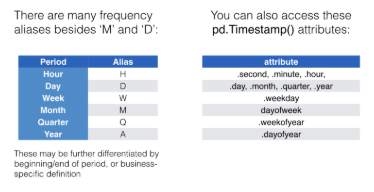


In [ ]:
# Create the range of dates here
seven_days = pd.date_range(start = '2017-1-1', periods = 7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## **INDEXING & RESAMPLING TIME SERIES**

TIME SERIES TRANSFORMATION
- Basic Time Series Transformations include:
  - Parsing string dates and convert to datetime64
  - Selecting & Slicing for specific subperiods.
  - Setting & Changing DateTimeIndex frequency.
    - Changing the frequency to a higher or lower value
    - Upsampling: Involves increasing the time frequency, which requires generating new data.
    - Downsampling: Involves decreasing the frequency, which requires aggregating data.

In [ ]:
# Getting GOOG Stock Prices
# To convert the strings to the correct datatype
# pd.to_datetime()
  # Parse Date String
  # Convert to datetime64e
tablename.date = pd.to_Datetime(google.date)
tablename.info()

#Converting string dates to np.datetime64
  # .set_index():
    # Date into index
    # inplace:
      # don't create copy
tablename.set_index('date', inplace = True)
tablename.info()
# PLOTTING THE TIMESERIES
tablename.price.plot(title = 'Google Stock Price')
plt.tight_layout(); plt.show()

# Partial String Indexing
  # Selecting/indexing using strings that parse to dates
tablename['date'].info() # PASS STRING FOR PART OF DATE
  # Passing a slice where it has a start and an end
tablename['2015-3':'2016-2'].info()

# NOTE THAT THE DATE RANGE WILL BE INCLUSIVE OF THE END DATE,
# DIFFERENT FROM OTHER INTERVALS IN PYTHON

# PARTIAL STRING INDEXING
# USING .loc WITH A COMPLETE DATE AND A COLUMN LABEL
# TO SELECT A SPECIFIC STOCK PRICE
tablename.loc['yyyy-mmm-dd', 'column'] # use full date with .loc[]

# asfreq(): set frequency
  # You can set the frequency information using .asfreq()
  # .asfreq('D'):
    # Convert DateTimeIndex to calendar day frequency
tablename.asfreq('D').info() # SET CALENDAR DAY FREQUENCY
# The alias 'D' stands for calendar day frequency.

# asfreq(): reset frequency
  # FOR BUSINESS DAY FREQUENCY
  # .asfreq('B'):
    # Convert DateTimeIndex to business day frequency
tablename = tablename.asfreq('B') # Change to calendar day frequency
tablename.info()

tablename[tablename.columnname.isnull()] # SELECTING MISSING COLUMN VALUES


In [ ]:
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data
print(data.info())

# Plot data
data.plot(subplots = True)
plt.show()


In [ ]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots = True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots = True)
plt.show()



## **Lags, changes, and returns for stock price series**

- Basic Time Series Calculations
  - Typical Time Series Manipulation include:
    - Shift or lag values back or forward back in time.
    - Get the difference in value for a given time period.
    - Compute the percent change over any number of periods.
- pandas built-in methods rely on pd.DateTimeIndex


In [ ]:
# GETTING GOOG STOCK PRICES
tablename = pd.read_csv('table.csv', parse_dates=['date'], index_col='date')
# INSTEAD OF .datetime function, you can tell read_csv to parse certain columns
# as dates 'just provide one or more target labels as a list.

# .shift(): Moving data between past and future
# .shift():
  # defaults to periods = 1
  # 1 period into future
table['shifted'] = table.column.shift() # default: periods = 1
table.head()

# .shift(periods =-1)
  # lagged data
  # 1 period back in time
table['shifted'] = table.column.shift(periods=-1) # default: periods = 1
table.head[['price', 'lagged', 'shifted']].tail(3)
# Shifting data is useful to compare data at different points in time.




- Calculating change from period to period, which is called financial return in finance
- Where $\frac{X_t}{X_{t-1}}$


```
table['change'] = table.column.div(table.shifted)
```
- The method .div, allows you not only to divide a Series by a value, but by an entire Series.
- For example by another column in the same DataFrame.

- Chaning all DataFrame methods that return a DataFrame
- Calculating one-period percent change
```
table['return'] = table.change.sub(1).mul(100)
table[['price', 'shifted', 'change', 'return']].head(3)
```
- The returned dataframe will be used as an input for the next calculation.

**Another time series method**
- diff(): built-in time-series change
- Difference in valye for two adjacent periods
- Where $X_t - X_{t-1}$
```
google['diff'] = google.price.diff()
```
- This calcullate the change between values at different points in time.

- pct_change(): built-in time-series % change
  - Percent change for two adjacent periods
  - Where $\frac{X_t}{X_{t-1}}$
```
google['pct_change'] = google.price.pct_change().mul(100)
google[['price', 'return', 'pct_change']].head(3)
```

- Looking ahead: Get multi-period returns
```
google['return_3d'] = google.price.pct_change(periods=3).mul(100)
google[['price', 'return_3d']].head()
```


In [ ]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods = -90)
google['shifted'] = google.Close.shift(periods = 90)

# Plot the google price series
google.plot()
plt.show()




In [ ]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo['shifted_30'])

# Get the 30-day price difference
yahoo['diff_30'] =  yahoo.price.diff(periods = 30)

# Inspect the last five rows of price
print(yahoo['price'].tail())

# Show the value_counts of the difference between change_30 and diff_30
print((yahoo['change_30'] - yahoo['diff_30']).value_counts())


In [ ]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods = 1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods = 30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods = 360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()

## **Compare time series growth rates**

